# Latent Semantic Analysis

## Introduction

Linear algebra plays a pivotal role in various fields, offering powerful tools
and techniques for solving complex problems and extracting meaningful insights from data. One intriguing application of linear algebra in the realm of natural language processing and information retrieval is Latent Semantic Analysis (LSA). LSA is a mathematical and statistical method that involves the application of singular value decomposition (SVD) to large datasets, commonly represented in matrix form, with the aim of uncovering latent semantic structures within the data.

## Dataset


The fetch_20newsgroups dataset from scikit-learn's datasets module is a popular text dataset commonly used for natural language processing and machine learning tasks, particularly for text classification and clustering. This dataset comprises a collection of approximately 20,000 newsgroup documents, spanning 20 different newsgroups or categories. Each newsgroup represents discussions on a specific topic or theme, and the dataset as a whole reflects the diversity of topics discussed in online forums during the late 1990s. In this assignment, We'll only use 5 of the 20 newsgroups for simplicity and efficiency.

In [1]:
from sklearn.datasets import fetch_20newsgroups

categories =  ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.electronics', 'sci.space']
train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

## Demonstration

In [2]:
print(train.data[0])
print(len(train.data))

From: halsall@murray.fordham.edu (Paul Halsall)
Subject: Catholic Liturgy
Reply-To: halsall@murray.fordham.edu
Organization: J. Random Misconfigured Site
Lines: 60


	The problems with Catholic liturgy are likely to continue for
some time.  The problem is, in a nutshell, this: the Liturgy is a
symbolic action - in other words Catholics do [or should] believe that
the _signs_ during the mass - Water, Blessings, Vestments, Altar,
Relics, etc - are real. That is the sprinkling of water bestows real,
almost tangible, holiness, the Vestments are a real indication of real
sacred time. The point of a _symbol_ is that it is understood by all
to be connected to an underlying REAL referent. This kind of thinking
precludes analysis; holy water is not holy because of anything, it
simply IS holy.

But, modern westerners find it extremely difficult, especially if
well- educated, to think of the mass as a symbol. We are more likely
to see it as a _sign_, ie an action that represents grace, but which


## Document-term co-occurrence Matrix

In a document-term co-occurrence matrix, each row corresponds to a document in the dataset, and each column corresponds to a unique term. The entry in cell $M_{ij}$ represents the frequency of term $j$ occurring in document
$i$. Now create the co-occurrence matrix using `CountVectorizer`.
analyze the sparsity of $M$ and $M^TM$.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import issparse
def vectorize(train_data):
    # Vectorize the training data using count vectorizer
    count_vect = CountVectorizer()
    X_train_counts = count_vect.fit_transform(train_data)
    return count_vect, X_train_counts

def analyze(data):
    # Print Shape, Is Sparse and Sparsity using scipy
    print("Shape:", data.shape)
    print("Is Sparse:", issparse(data))
    sparsity = 1.0 - (data.nnz / (data.shape[0] * data.shape[1]))
    print("Sparsity: {:.4f}".format(sparsity))

count_vect, X_train_counts = vectorize(train.data)
analyze(X_train_counts)
C = X_train_counts.T * X_train_counts
analyze(C)

Shape: (2847, 40182)
Is Sparse: True
Sparsity: 0.9961
Shape: (40182, 40182)
Is Sparse: True
Sparsity: 0.9620


## Singular Value Decomposition

The next step involves finding the Singular Value Decomposition (SVD) matrix and embedding the data into a reduced-dimensional space. Describe the process of obtaining the SVD for the document-term co-occurrence matrix. What are the resulting matrices $(U, Σ, V^T)$, and how do they relate to the original matrix.

In [4]:
from scipy.sparse.linalg import svds

# Convert the document-term co-occurrence matrix to a floating-point data type
C_float = C.astype(float)

# Perform Singular Value Decomposition (SVD)
u, s, vh = svds(C_float, k=2)

# Print the shapes of resulting matrices
print(f'U: {u.shape}')
print(f'S: {s.shape}')
print(f'V^H: {vh.shape}')

U: (40182, 2)
S: (2,)
V^H: (2, 40182)


### Singular Value Decomposition (SVD) for Document-Term Co-occurrence Matrix

**Process:**
1. **Matrix Formation:**
   - Construct document-term co-occurrence matrix \(C\) from the dataset.
   - \(C_{ij}\) represents the frequency of term \(j\) in document \(i\).

2. **SVD Calculation:**
   - Compute SVD for \(C\) using scipy's `svds` function.
   - Resulting matrices: \(U\), \(S\), and \(V^T\).

**Resulting Matrices:**
- **\(U\):** Document-topic matrix. Rows represent documents, columns are latent topics.
- **\(S\):** Diagonal matrix with singular values, indicating importance of latent topics.
- **\(V^T\):** Transpose of topic-term matrix. Rows represent latent topics, columns are terms.

**Relationship to Original Matrix:**
- \( C = U \cdot S \cdot V^T \)
- Represents original matrix in reduced-dimensional space.
- Identifies latent topics and their associations with terms and documents.

Define the concept of choosing the top-k singular values in the context of the Σ matrix obtained from SVD. What does it mean to truncate the singular values, and how does this process contribute to dimensionality reduction. Discuss the criteria or considerations involved in selecting an appropriate value for k. How might the choice of k impact the quality of the resulting reduced-dimensional space and the representation of latent semantic structures.

### Choosing Top-k Singular Values in SVD

**Concept:**
- **Truncation of Singular Values (Σ):**
  - Selecting the top-k singular values involves keeping the first \(k\) elements in the Σ matrix and setting the rest to zero.
  - This truncation reduces the dimensionality of the data.

**Contribution to Dimensionality Reduction:**
- **Dimensionality Reduction:**
  - Truncating singular values provides a more concise representation of the data.
  - It focuses on the most important information while discarding less significant components.

**Considerations for Choosing k:**
- **Criteria:**
  - **Elbow Method:** Choose \(k\) where the rate of singular value decrease slows.
  - **Explained Variance:** Consider a level of explained variance (e.g., 95%).
  - **Application Requirements:** Tailor \(k\) to task needs and computational constraints.

**Impact on Representation and Structures:**
- **Higher k:** More detailed representation but potentially more noise.
- **Lower k:** Faster computations, general patterns retained, but less detail.

**Conclusion:**
- The choice of \(k\) in SVD balances dimensionality reduction with information retention.
- It requires consideration of task-specific needs and computational resources.

Calculate the new matrix resulting from the truncated SVD with the chosen top-k singular values.

In [ ]:
import numpy as np

k = 2
uk = u[:, :k]
sk = np.diag(s[:k])
vhk = vh[:k, :]

C_k = uk @ sk @ vhk
print(C_k.shape)

Discuss the interpretation of the resulting matrices U and V. How do these matrices contribute to the understanding of semantic relationships between documents and terms.

1. **Matrix \(U\):**
   - **Interpretation:**
     - \(U\) captures how each document is associated with latent topics.
     - Columns represent topics, and entries indicate the strength of the association.

2. **Matrix \(V\):**
   - **Interpretation:**
     - \(V\) captures how each topic is associated with terms.
     - Rows represent topics, and entries indicate the strength of the association with terms.

3. **Overall Semantic Understanding:**
   - **Document-Topic Associations:**
     - High values in \(U\) reveal strong associations of topics with specific documents.
   - **Topic-Term Associations:**
     - High values in \(V\) reveal strong associations of topics with specific terms.
   - **Semantic Structure:**
     - The overall structure of \(U\) and \(V\) uncovers the latent semantic structure, aiding in understanding semantic relationships between documents and terms.

## Word Embedding

Word embedding is a technique used to map words from a vocabulary to vectors of real numbers. These vectors capture the semantic relationships between words in a geometric space, where words that share similar meanings are mapped to similar vectors. Word embedding is a popular approach in natural language processing and information retrieval, and is commonly used in the development of language models in machine learning. We use the $i$ th row of $U$ as the embedding vector for the $i$ th word in the vocabulary.

In [5]:
import numpy as np
word_to_index = count_vect.vocabulary_

def cosine_similarity(a, b):
    # Compute cosine similarity between vectors a and b
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    similarity = dot_product / (norm_a * norm_b)
    return similarity

def word_similarity(word1, word2):

    embedding_word1 = u[word_to_index[word1]]
    embedding_word2 = u[word_to_index[word2]]
    similarity = cosine_similarity(embedding_word1, embedding_word2)
    return similarity


# Test word similarities
print(f"Similarity of `god` and `jesus`: {word_similarity('god', 'jesus')}")
print(f"Similarity of `god` and `devil`: {word_similarity('god', 'devil')}")
print(f"Similarity of `god` and `soccer`: {word_similarity('god', 'soccer')}")
print(f"Similarity of `tiger` and `rabbit`: {word_similarity('tiger', 'rabbit')}")
print(f"Similarity of `tiger` and `earth`: {word_similarity('tiger', 'earth')}")
print(f"Similarity of `star` and `earth`: {word_similarity('star', 'earth')}")


Similarity of `god` and `jesus`: 0.9987103687591992
Similarity of `god` and `devil`: 0.9982879422191712
Similarity of `god` and `soccer`: -0.6782298264132838
Similarity of `tiger` and `rabbit`: 0.9412811922092384
Similarity of `tiger` and `earth`: 0.423203176941106
Similarity of `star` and `earth`: 0.8168070603061529


## Plot Embeddings

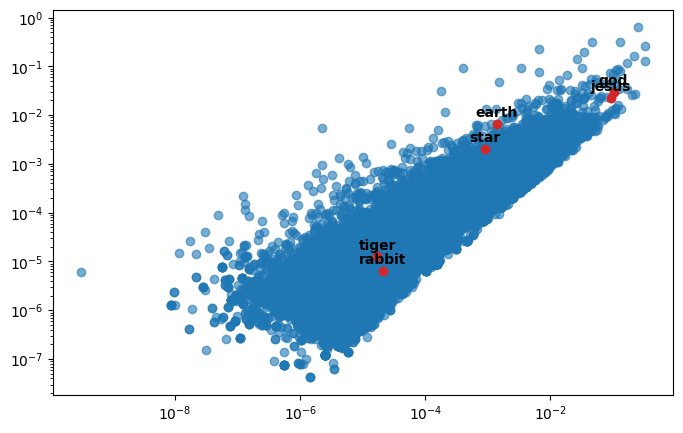

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))  # Increase the figure size for better visibility
start = 0

def plot_word(word):
    global start

    if start == 0:
        plt.scatter(abs(u[:, 0]), abs(u[:, 1]), alpha=0.6, c="tab:blue")
        start += 1
    index = word_to_index[word]
    embedding_word = u[index]

    plt.scatter(abs(embedding_word[0]), abs(embedding_word[1]), alpha=1.0, c="tab:red")

    plt.annotate(word, (abs(embedding_word[0]), abs(embedding_word[1])), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10, fontweight='bold')

# Plot embeddings with norms less than 0.1
plot_word('god')
plot_word('jesus')
plot_word('tiger')
plot_word('rabbit')
plot_word('star')
plot_word('earth')

# Set x and y axes to logarithmic scale for better visualization
plt.xscale('log')
plt.yscale('log')

plt.show()


# Word2Vec (Optional)

Word2Vec is a popular word embedding technique that involves the use of neural networks to learn word embeddings from large datasets. The Word2Vec model is trained on a large corpus of text, and the resulting word vectors demonstrate interesting semantic relationships between words. In this assignment, we'll explore the use of Word2Vec to learn word embeddings from the 20 newsgroups dataset.

Word2Vec is mainly implemented in two ways: continuous bag-of-words (CBOW) and skip-gram. In this assignment, we'll use the CBOW model to train word embeddings on the 20 newsgroups dataset. CBOW predicts the current word based on a window of surrounding context words. The skip-gram model, on the other hand, predicts the surrounding context words based on the current word.

![image.png](attachment:image.png)

## Preprocessing

We'll remove stopwords and lemmatize the text data using the WordNetLemmatizer from the nltk package. We'll also remove punctuation and convert all text to lowercase.
Then we create a list of windows of context words for each word in the corpus. The size of the window is a hyperparameter that can be tuned to improve the performance of the model. We'll use a window size of 2 for this assignment.

In [7]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def clean_data(train_data):
    cleaned_words = []
    words_index = {}
    for text in train_data:
        text = text.lower()
        text = text.replace('\n', ' ')
        tokenized_data = word_tokenize(text)
        stop_words = set(stopwords.words('english'))
        stop_words.update(['.',',',':',';','(',')','#','--','...','"'])
        cleaned_words += [word for word in tokenized_data if word not in stop_words]
    for word in cleaned_words:
        if word not in words_index:
            words_index[word] = len(words_index)
    windows = []
    for i in range(2, len(cleaned_words) - 2):
        window = [cleaned_words[i - 2], cleaned_words[i - 1], cleaned_words[i + 1], cleaned_words[i + 2]]
        window = [words_index[word] for word in window]
        windows.append((window, words_index[cleaned_words[i]]))
    return windows, words_index

windows, words_index = clean_data(train.data)

In [9]:
len(words_index)

48081

In [61]:
import torch
from torch.utils.data import Dataset, DataLoader

class CorpusWindows(Dataset):
    def __init__(self, windows):
        self.windows = windows

    def __len__(self):
        return len(self.windows)

    def __getitem__(self, idx):
        window, center_word = self.windows[idx]
        return torch.tensor(window), torch.tensor(center_word)

# Create a dataloader for windows
batch_size = 512  # You can adjust this value based on your available memory and training requirements
corpus_dataset = CorpusWindows(windows)
corpus_dataloader = DataLoader(corpus_dataset, batch_size=batch_size, shuffle=True)

In [62]:
from torch import nn

class CBOW(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(CBOW, self).__init__()
        # Initialize embeddings and linear layers
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(embedding_dim, 512)
        self.linear2 = nn.Linear(512, vocab_size)


    def forward(self, inputs):
        # Sum the embeddings of context words
        embeds = self.embeddings(inputs).sum(dim=1)
        # Pass through linear layer
        out = self.linear2(self.linear1(embeds))
        return out

    def get_embeddings(self):
        # Return the embeddings
        return self.embeddings.weight.data

    def get_word_embedding(self, word):
        # Return the embedding of the word
        word_idx = words_index[word]
        return self.embeddings(torch.tensor(word_idx))

# Example usage:
# vocab_size should be the total number of unique words in your dataset
# embedding_dim is the dimensionality of the word embeddings
# vocab_size = len(words_index)
# embedding_dim = 2
# cbow_model = CBOW(vocab_size, embedding_dim)

# # Access embeddings
# embeddings = cbow_model.get_embeddings()

# # Access embedding of a specific word
# word = 'example'
# word_embedding = cbow_model.get_word_embedding(word)
# word_embedding

In [63]:
from tqdm import tqdm, trange

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vocab_size = len(words_index)
embedding_dim = 2
model = CBOW(vocab_size, embedding_dim)
model.to(device)

# Initialize the loss function
criterion = nn.CrossEntropyLoss()

# Initialize the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

total_loss = 0
pbar = tqdm(corpus_dataloader)  # Assuming you have a DataLoader named corpus_dataloader
for context, target in pbar:
    # Move context and target to device
    context, target = context.to(device), target.to(device)

    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(context)

    # Calculate the loss
    loss = criterion(outputs, target)

    # Backward pass
    loss.backward()

    # Update parameters
    optimizer.step()

    # Update total_loss
    total_loss += loss.item()

    # Update progress bar
    pbar.set_description(f'Loss: {total_loss / len(pbar):.4f}')


Loss: 10.7162: 100%|██████████| 1102/1102 [00:36<00:00, 30.23it/s]


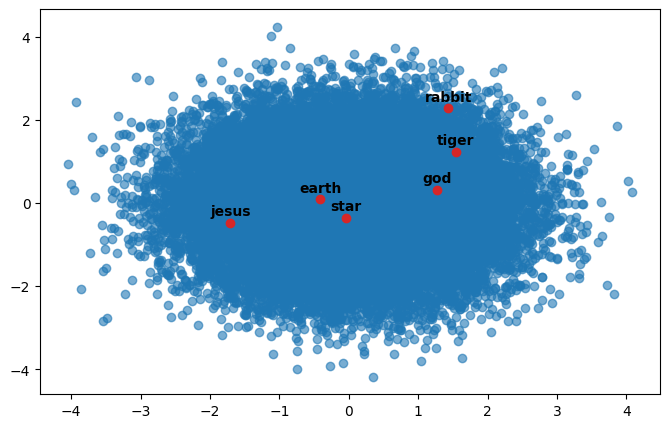

In [64]:
import matplotlib.pyplot as plt

embeddings = model.embeddings.weight.data.cpu().numpy()
plt.figure(figsize=(8, 5))
start = 0

def plot_word(word):
    global start

    if start == 0:
        plt.scatter(embeddings[:, 0], embeddings[:, 1], alpha=0.6, c="tab:blue")
        start += 1
    index = word_to_index[word]
    embedding_word = embeddings[index]

    plt.scatter(embedding_word[0], embedding_word[1], alpha=1.0, c="tab:red")

    plt.annotate(word, (embedding_word[0], embedding_word[1]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10, fontweight='bold')

# Plot embeddings with norms less than 0.1
plot_word('god')
plot_word('jesus')
plot_word('tiger')
plot_word('rabbit')
plot_word('star')
plot_word('earth')

# Set x and y axes to logarithmic scale for better visualization
# plt.xscale('log')
# plt.yscale('log')

plt.show()
